Analisis de datos

In [1]:
from categorias import get_categorias
from medios import get_capturas_df, get_medios_path


df = get_capturas_df()
categorias = get_categorias(df)


In [2]:
df

,id,url,Timestamp,DescripcionEnEstudio,Medico_ID,TipoEstudio,Age,Sexo,file_exists_status
0,6153,Estudios/196/20201222/IMG_20201222_080548_0c71...,2020-12-22 08:05:48.483,LARINGE,3,1,56,M,False
1,6160,Estudios/196/20201222/IMG_20201222_080651_e066...,2020-12-22 08:06:51.740,DUODENO,3,1,56,M,False
2,6794,Estudios/209/20201226/IMG_20201226_094710_a2ac...,2020-12-26 09:47:10.640,RETRO-HERNIA,1,1,65,M,False
3,7255,Estudios/221/20201229/IMG_20201229_083337_9fcd...,2020-12-29 08:33:37.810,ESTOMAGO,3,1,56,F,False
4,7289,Estudios/221/20201229/IMG_20201229_090448_5932...,2020-12-29 09:04:48.220,ANGULO,3,4,56,F,False
...,...,...,...,...,...,...,...,...,...
36209,184594,Estudios/5456/20220806/IMG_20220806_110542_7c6...,2022-08-06 11:05:42.940,CUERPO-POLIPO NBI,1,1,68,F,False
36210,179600,Estudios/5339/20220723/IMG_20220723_080621_61e...,2022-07-23 08:06:21.550,ESOFAGO,3,1,33,F,False
36211,179614,Estudios/5339/20220723/IMG_20220723_080738_258...,2022-07-23 08:07:38.787,RETRO-FONDO,3,1,33,F,False
36212,179649,Estudios/5341/20220723/IMG_20220723_084338_1a4...,2022-07-23 08:43:38.827,ESOFAGO,3,1,30,M,False


In [3]:
categorias

,Categoria,Nombre
0,290,UNION EG
1,2,DUODENO
2,1,LARINGE
3,6,CIEGO
4,17,COLON SIGMOIDES
5,9,RECTO
6,7,COLON TRANSVERSO
7,8,CUERPO
8,28,ANTRO-PILORO
9,2226,COLONDERECHO


In [4]:


# categorias_dict = list(categorias.to_dict().values())[1] #,list(categorias.to_dict().values())[1]}
# categorias_dict

Librerias de tensorflow

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-02-18 01:09:53.252772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 01:09:53.735845: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-18 01:09:53.735896: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-18 01:09:53.735901: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [6]:
medios_path = get_medios_path()
print(medios_path)

import pathlib
data_dir = pathlib.Path(medios_path)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

/home/franciscor/Gastroclub/EstudiosSeparados/
5613


In [7]:
# categoria = categorias.iloc[0]
# print(categoria["Nombre"])
# import random
# imagen = list(data_dir.glob(f'{categoria["Categoria"]}/*'))
# imagen_int = random.randint(0, len(imagen))
# print(categoria["Categoria"])
# # print (imagen[imagen_int])
# PIL.Image.open(str(imagen[imagen_int]))


In [8]:
# categoria = categorias.iloc[2]
# print(categoria["Nombre"])
# import random
# imagen = list(data_dir.glob(f'{categoria["Categoria"]}/*'))
# imagen_int = random.randint(0, len(imagen))

# print (imagen[imagen_int])
# PIL.Image.open(str(imagen[imagen_int]))

In [9]:
batch_size = 32
img_height = 200
img_width = 200

#TODO: pre-proceso de distintos tamanios

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12200 files belonging to 18 classes.
Using 9760 files for training.


2023-02-18 01:09:54.368998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 01:09:54.386390: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 01:09:54.386541: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 01:09:54.386893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12200 files belonging to 18 classes.
Using 2440 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names[:10])

['ANTRO', 'ANTRO_PILORO', 'CIEGO', 'COLON_DERECHO', 'COLON_IZQ', 'COLON_SIGMOIDES', 'COLON_TRANSVERSO', 'CUERPO', 'DUODENO', 'ESOFAGO']


In [13]:
train_ds


<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
categorias


,Categoria,Nombre
0,290,UNION EG
1,2,DUODENO
2,1,LARINGE
3,6,CIEGO
4,17,COLON SIGMOIDES
5,9,RECTO
6,7,COLON TRANSVERSO
7,8,CUERPO
8,28,ANTRO-PILORO
9,2226,COLONDERECHO


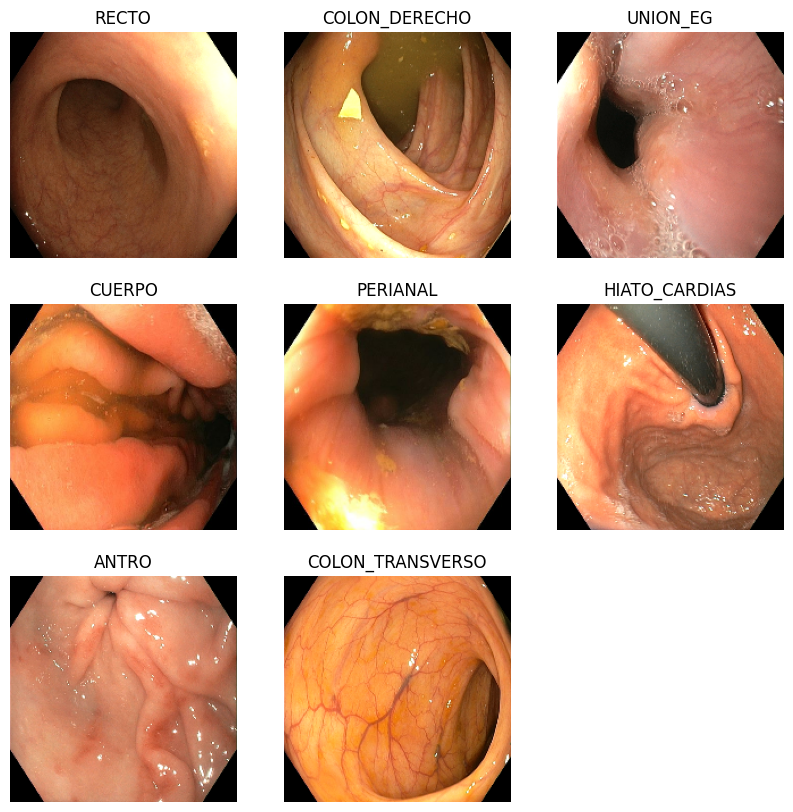

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
#         titulo = list(categorias[categorias['Categoria'] == int(class_names[labels[i]])]["Nombre"])[0]
        
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [16]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 200, 200, 3)
(32,)


In [17]:
# break

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
normalization_layer = layers.Rescaling(1./255)


In [20]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 1.0


2023-02-18 01:09:59.866436: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [21]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_top_k_categorical_accuracy'])

In [23]:
#model.compile(loss='mse', optimizer='adam', metrics=[rmse])


In [24]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1

In [25]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=2
)

Epoch 1/50


2023-02-18 01:10:04.823039: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-02-18 01:10:05.220522: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-18 01:10:05.221670: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f7e04003fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-18 01:10:05.221679: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-02-18 01:10:05.224430: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-18 01:10:05.292975: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of 

305/305 - 9s - loss: 2.0945 - sparse_top_k_categorical_accuracy: 0.7208 - val_loss: 1.7760 - val_sparse_top_k_categorical_accuracy: 0.8348 - 9s/epoch - 31ms/step
Epoch 2/50
305/305 - 2s - loss: 1.4456 - sparse_top_k_categorical_accuracy: 0.9036 - val_loss: 1.5245 - val_sparse_top_k_categorical_accuracy: 0.8943 - 2s/epoch - 8ms/step
Epoch 3/50
305/305 - 2s - loss: 1.1166 - sparse_top_k_categorical_accuracy: 0.9504 - val_loss: 1.7428 - val_sparse_top_k_categorical_accuracy: 0.8750 - 2s/epoch - 8ms/step
Epoch 4/50
305/305 - 2s - loss: 0.8031 - sparse_top_k_categorical_accuracy: 0.9778 - val_loss: 1.9048 - val_sparse_top_k_categorical_accuracy: 0.8762 - 2s/epoch - 8ms/step
Epoch 5/50
305/305 - 2s - loss: 0.5131 - sparse_top_k_categorical_accuracy: 0.9913 - val_loss: 2.4114 - val_sparse_top_k_categorical_accuracy: 0.8611 - 2s/epoch - 8ms/step
Epoch 6/50
305/305 - 2s - loss: 0.3346 - sparse_top_k_categorical_accuracy: 0.9965 - val_loss: 2.4793 - val_sparse_top_k_categorical_accuracy: 0.8586 

Epoch 49/50
305/305 - 2s - loss: 0.0075 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 8.6084 - val_sparse_top_k_categorical_accuracy: 0.8189 - 2s/epoch - 8ms/step
Epoch 50/50
305/305 - 2s - loss: 0.0090 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 9.0629 - val_sparse_top_k_categorical_accuracy: 0.8127 - 2s/epoch - 8ms/step


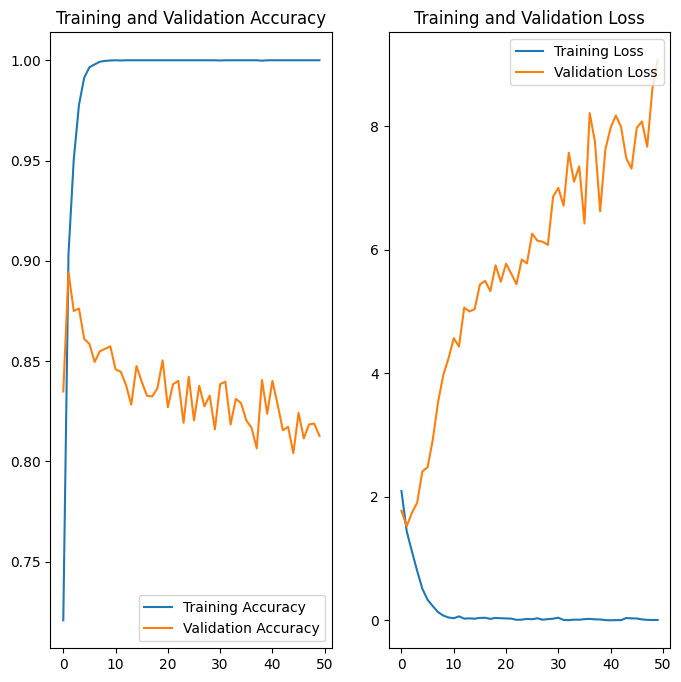

In [26]:
acc = history.history['sparse_top_k_categorical_accuracy']
val_acc = history.history['val_sparse_top_k_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

/tmp/ipykernel_69724/3679825633.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = Image.open(f"{test_image_base}/duodeno_01.png").resize((img_height, img_width), Image.ANTIALIAS)


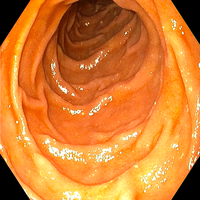

In [27]:
from PIL import Image
test_image_base = "/home/franciscor/Gastroclub/new"
img = Image.open(f"{test_image_base}/duodeno_01.png").resize((img_height, img_width), Image.ANTIALIAS)
img

In [28]:
img = np.array(img)

prediction = model.predict(img[None,:,:])
# print(decode_predictions(prediction, top=3)[0])
print(prediction)
max_prediction = np.argmax(prediction)

class_names[labels[max_prediction]]




1/1 [==============================] - 0s 72ms/step
[[-2.5331553e+01 -4.5342956e+00  8.7854977e+00  1.0383715e+01
   1.4564464e+01  2.8277040e+01  2.7073245e+00 -7.6516569e-02
   1.3129932e+01 -1.1124359e+02 -9.1110582e+00 -1.7296526e+01
  -4.3344151e+01 -3.3206497e+01  1.2509224e+00  6.1163297e+00
  -1.2235309e+01 -3.9928013e+01]]


'HIATO_CARDIAS'

In [29]:
tf.keras.models.save_model(
    model,
    "/home/franciscor/output",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

INFO:tensorflow:Assets written to: /home/franciscor/output/assets


INFO:tensorflow:Assets written to: /home/franciscor/output/assets
